Author- Jay Shah
Date- 9-June

In [166]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [169]:
train_dataset = datasets.MNIST(
    root='data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root='data',
    train=False,
    transform=transform,
    download=True
)


In [167]:
transform = transforms.ToTensor()

In [6]:
from torch.utils.data import DataLoader

In [170]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [171]:
class CustomTensorDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    
    def __len__(self): 
        return self.x.shape[0]
    
    def __getitem__(self, idx): 
        return self.x[idx], self.y[idx]

In [189]:
class EnhancedNeuralNet(nn.Module):
    def __init__(self):
        super(EnhancedNeuralNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = EnhancedNeuralNet()

In [173]:
def train_network(dataloader, model, epochs=20):
    optimizer = SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    loss_values = []
    epoch_data = []
    
    for epoch in range(epochs):
        print(f'Starting epoch {epoch+1}')
        num_batches = len(dataloader)
        
        for batch_idx, (inputs, targets) in enumerate(dataloader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            epoch_data.append(epoch + batch_idx/num_batches)
            loss_values.append(loss.item())
    
    return np.array(epoch_data), np.array(loss_values)


In [174]:
epoch_info, loss_info = train_network(train_loader, model)

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20


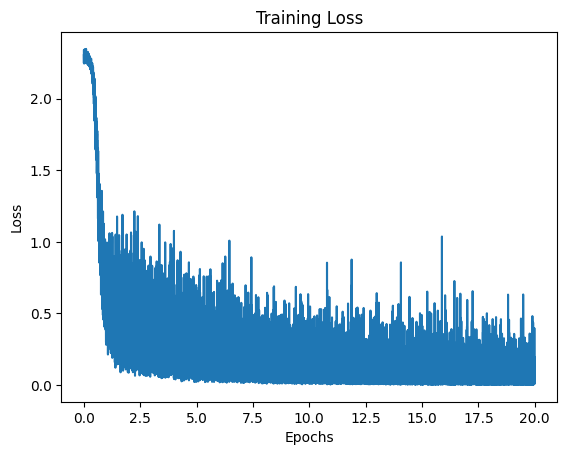

In [175]:
plt.plot(epoch_info, loss_info)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [180]:
def evaluate_model(model, dataset, num_samples=2000):
    model.eval()
    with torch.no_grad():
        indices = torch.randperm(len(dataset))[:num_samples]
        samples = torch.stack([dataset[i][0] for i in indices])
        predictions = model(samples).argmax(axis=1)
        return samples, predictions

test_samples, predictions = evaluate_model(model, test_dataset)


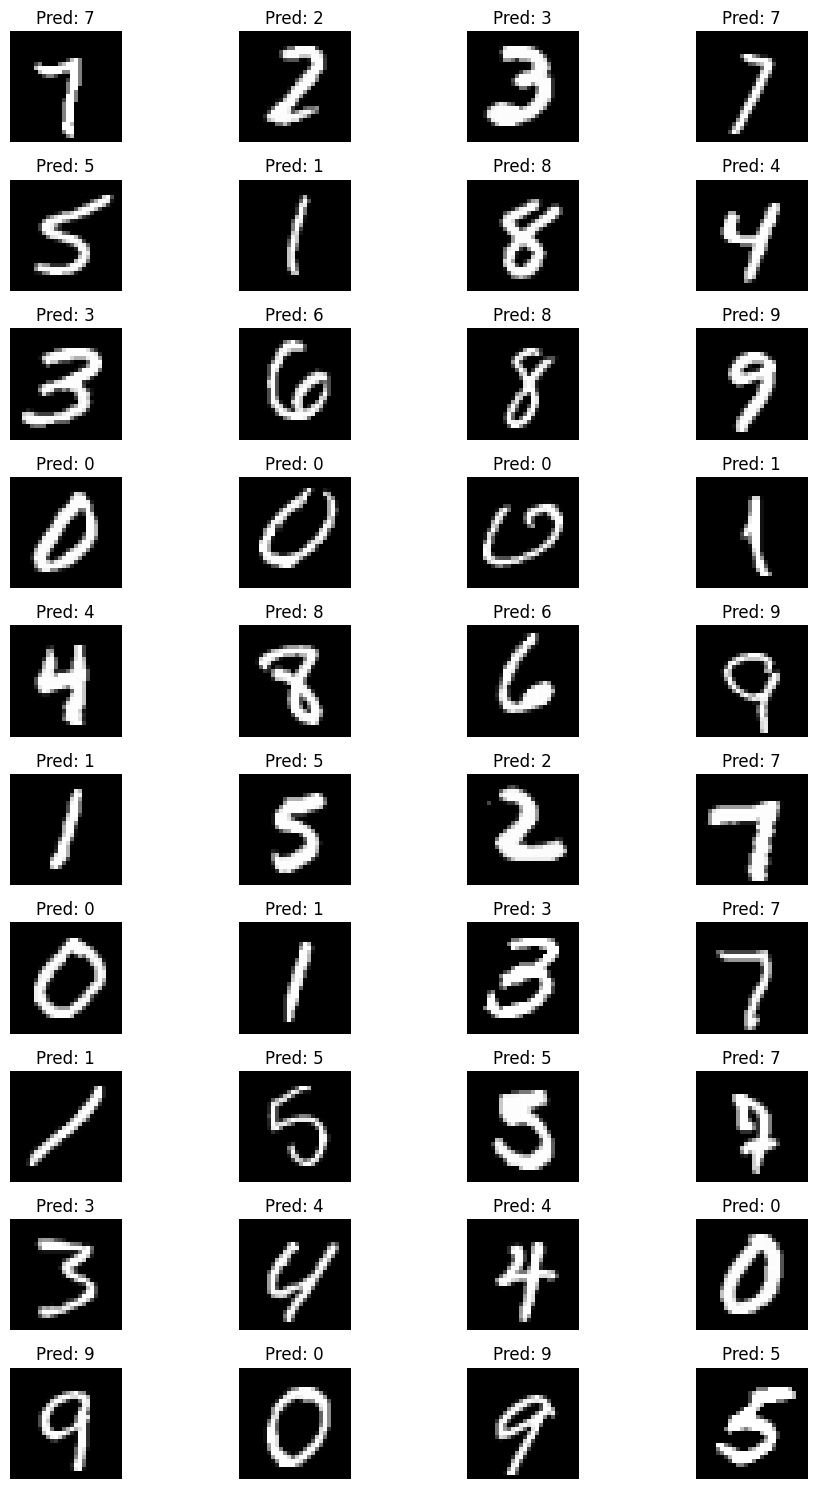

In [181]:
fig, axes = plt.subplots(10, 4, figsize=(10, 15))
for i in range(40):
    ax = axes[i//4, i%4]
    ax.imshow(test_samples[i].squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predictions[i].item()}')
    ax.axis('off')
fig.tight_layout()
plt.show()

In [183]:
from PIL import Image
import matplotlib.pyplot as plt

In [186]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')

    transform = transforms.Compose([
        transforms.Resize((28, 28)), 
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)
    return img_tensor

In [187]:
image_path = '/Users/jayshah/Downloads/5.png'
img_tensor = preprocess_image(image_path)


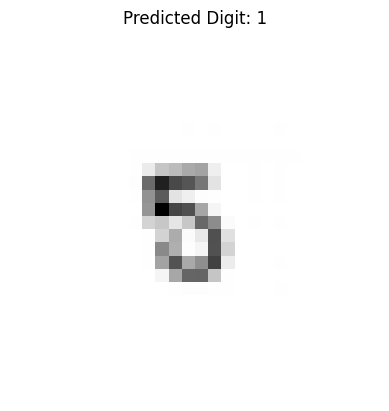

In [199]:
model.eval()
with torch.no_grad():
    prediction = model(img_tensor).argmax(axis=1).item()
    
plt.imshow(img_tensor.squeeze(), cmap='gray')
plt.title(f'Predicted Digit: {prediction}')
plt.axis('off')
plt.show()